In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/SUTD hackathon")
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import PIL.Image as Image

import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
path1 = '/content/drive/MyDrive/SUTD hackathon/caleb_py/caleb.h5'
densenet_model = tf.keras.models.load_model((path),custom_objects={'KerasLayer':hub.KerasLayer})
path2 = '/content/drive/MyDrive/SUTD hackathon/rainer_model_py/model.h5'
mobilenet_model = tf.keras.models.load_model((path),custom_objects={'KerasLayer':hub.KerasLayer})

In [21]:
densenet_model.summary()
mobilenet_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6150      
Total params: 7,043,654
Trainable params: 6,150
Non-trainable params: 7,037,504
_______________________________________________

Found 10 files belonging to 1 classes.
Predictions:
 [4, 0, 1, 5, 0, 3, 3, 1, 3, 2]


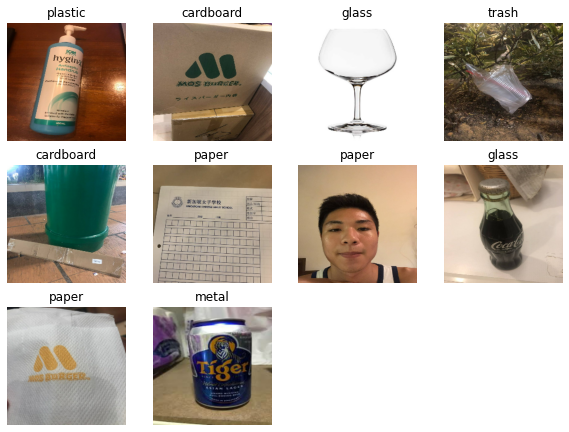

In [65]:
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
path = '/content/drive/MyDrive/SUTD hackathon/rainer_model_py/unseen_test/'
#path = '/content/drive/MyDrive/SUTD hackathon/rainer_model_py/faces/'
imgs = tf.keras.utils.image_dataset_from_directory(
    path, labels=None, image_size=(224,
    224)
)

image_batch = imgs.as_numpy_iterator().next()
prediction1 = densenet_model.predict_on_batch(image_batch)
prediction2= mobilenet_model.predict_on_batch(image_batch)

for i in range(len(prediction1)):
  prediction1[i]=prediction1[i]+prediction2[i]

pred = []
for i in prediction2:
    pred.append(np.argmax(i))

print('Predictions:\n', pred)

plt.figure(figsize=(10, 10))

for i in range(0,len(prediction1)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[pred[i]])
    plt.axis("off")